In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
%cd /content/gdrive/MyDrive/CS271P_project

/content/gdrive/MyDrive/CS271P_project


In [4]:
!ls

1m_tweets.csv  final_dataset.csv  glove


In [5]:
import pandas as pd
import re
import string
from wordcloud import WordCloud
from textblob import TextBlob, Word
import matplotlib.pyplot as plt

tweets = pd.read_csv('final_dataset.csv', encoding="utf-8")

In [6]:
tweets.head(20)

,text,label
0,is upset that he can't update his Facebook by ...,1
1,Meh... Almost Lover is the exception... this t...,1
2,@fleurylis I don't either. Its depressing. I d...,1
3,wonders why someone that u like so much can ma...,1
4,@mercedesashley Damn! The grind is inspiration...,1
5,@dannyvegasbaby danny im upset that i wasnt he...,1
6,@labelsnotlove my home town. My mammy called...,1
7,@ircmaxell - I think I need to find better ant...,1
8,@LoveMeagan it doesn't work your fan is upset,1
9,Wow. The most depressing thing in the world is...,1


In [7]:
tweets.tail(20)

,text,label
13316,I guess I'll just watch Jumper &amp; knock out...,0
13317,"@tommcfly write a song, thats always good",0
13318,@LittleFletcher I think it would be great if y...,0
13319,who loves yankovic's hoobastank comment??? I D...,0
13320,gooooodmorniiiiiiiiiiiiiiiing ya'll !!! peace ...,0
13321,Picking the Teroldego tomorrow early ... child...,0
13322,@xjenzombiee hahaha eyeliner is so complicated...,0
13323,@tommcfly go flying?? pick me up on your way...,0
13324,loves her new haircut,0
13325,@Denaaaa probably.. i wish i got one. lol but ...,0


In [8]:
depressed_tweets = tweets.loc[tweets['label']==1]
happy_tweets = tweets.loc[tweets['label']==0]
depressed_string = depressed_tweets['text'].str.cat(sep=' ')
happy_string = happy_tweets['text'].str.cat(sep=' ')

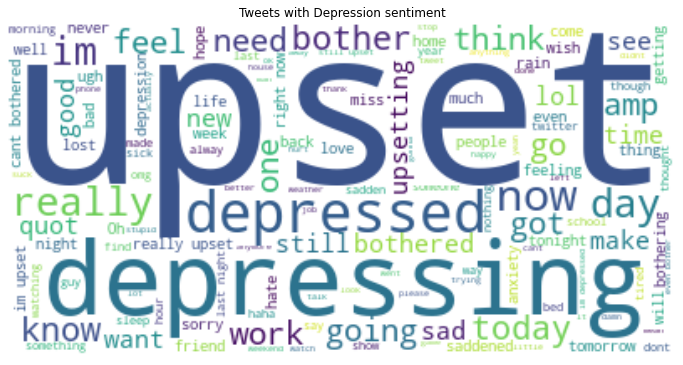

In [9]:
plt.figure(figsize=(12,10))
wordcloud_depress = WordCloud(max_font_size=200, background_color="white").generate(depressed_string) 
plt.imshow(wordcloud_depress, interpolation="bilinear")
plt.axis('off')
plt.title("Tweets with Depression sentiment");

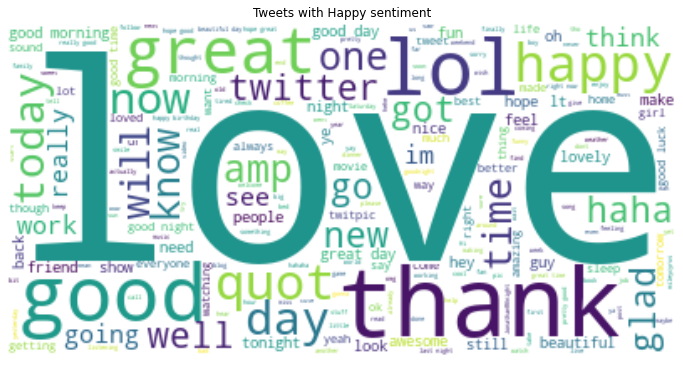

In [10]:
plt.figure(figsize=(12,10))
wordcloud_happy = WordCloud(max_font_size=200, background_color="white").generate(happy_string)
plt.imshow(wordcloud_happy, interpolation="bilinear")
plt.axis('off')
plt.title("Tweets with Happy sentiment");

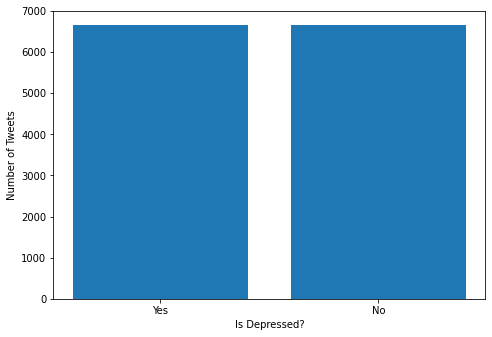

In [14]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
depressed = ['Yes', 'No']
count = [len(depressed_tweets), len(happy_tweets)]
ax.set_xlabel('Is Depressed?')
ax.set_ylabel('Number of Tweets')
ax.bar(depressed, count)
plt.show()